## Heart Disease Prediction  
### Simple Neural Network (Multilayer Perceptron)

<font size=4>The diagnosis of heart disease is done on a combination of clinical signs and test results. The aim is to detect the probability of heart disease for person.</font>

**Data Desctiption:**  
- age: age in years  
- gender: sex [1 = male, 0 = female]  
- chest_pain: chest pain type [Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic]  
- rest_bps: resting blood pressure (in mm Hg on admission to the hospital)  
- cholestrol: serum cholestoral in mg/dl  
- fasting_blood_sugar: (fasting blood sugar > 120 mg/dl) [1 = true; 0 = false]  
- rest_ecg: resting electrocardiographic results [Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]  
- thalach: maximum heart rate achieved  
- exer_angina: exercise induced angina [1 = yes, 0 = no]  
- old_peak = ST depression induced by exercise relative to rest  
- slope: the slope of the peak exercise ST segment [Value 0: upsloping, Value 1: flat, Value 2: downsloping]  
- ca: number of major vessels (0-3) colored by flourosopy  
- thalassemia: [0 = error (in the original dataset 0 maps to NaN's), 1 = fixed defect, 2 = normal, 3 = reversable defect]  


- target (the lable): [0 = no disease, 1 = disease]

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


#### Data loading and preprocessing

In [2]:
data = pd.read_csv('data/heart_disease.csv')
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot: xlabel='target', ylabel='count'>

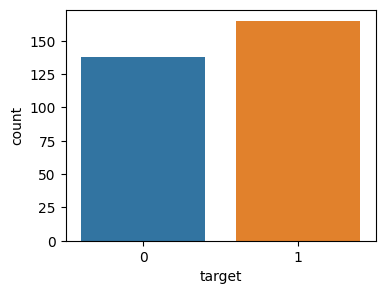

In [4]:
# target distribution

plt.figure(figsize=(4,3))
sns.countplot(data, x="target")

In [5]:
#NaN-values
data.isna().sum().sum()

0

<AxesSubplot: >

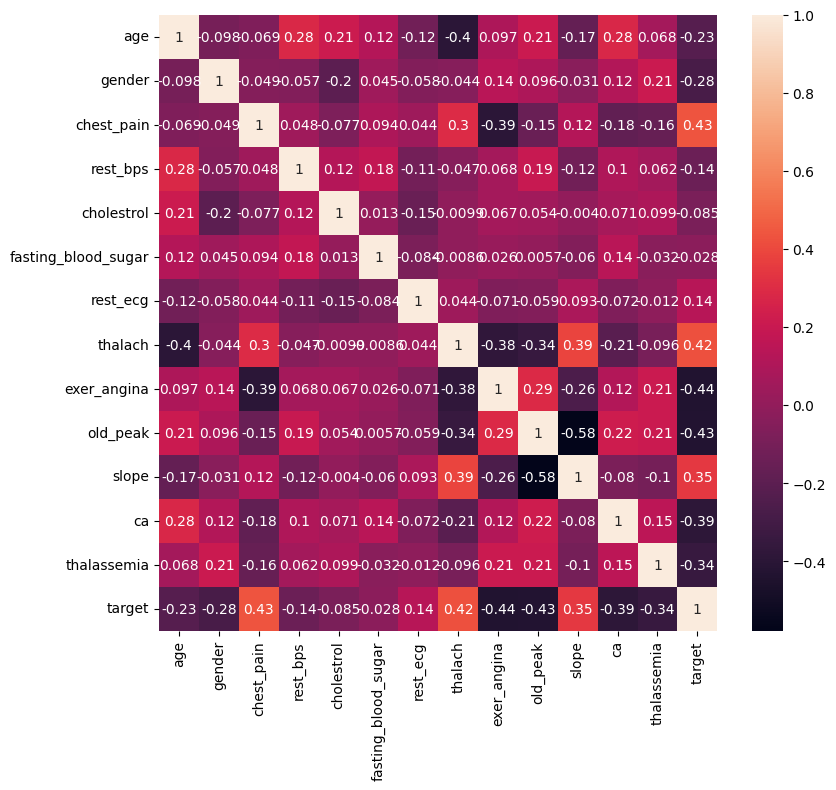

In [6]:
plt.figure(figsize=(9,8))
sns.heatmap(data.corr(), annot=True)

In [7]:
# Drop columns with low correlation
data = data.drop(columns=['fasting_blood_sugar', 'cholestrol', 'rest_bps', 'rest_ecg'])
data.head()

,age,gender,chest_pain,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [8]:
# Encoding multiclass features

data = pd.get_dummies(data, columns=['chest_pain', 'slope', 'ca', 'thalassemia'])

In [9]:
# Split into X-array and target

X = data.copy()
y = X.pop('target')

It is recommended to first split the data into training and test sets before normalizing the training data. Normalization should be applied only to the training set, and the normalization parameters (mean and standard deviation) should be saved. Then, these same parameters should be used to normalize the test set and any other datasets on which predictions need to be made.  
  
However, we will normalize the whole dataset.

In [10]:
# Normalization of X

normalizer = keras.layers.Normalization()
normalizer.adapt(X)


In [11]:
# Split into train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Model  
- single-layer perceptron

In [12]:
# Create constructor

model = keras.Sequential([
        normalizer,                            # слой предобработки
        layers.Dense(1, activation='sigmoid')  # полносвязный слой
])


In [13]:
# Compile model

model.compile(
             'adam', #алгоритм оптимизации
              loss='mean_absolute_error',
              metrics='accuracy'
             )

In [14]:
# Train model

model.fit(
         X_train,
         y_train,
         epochs=20,
         validation_data=(X_test, y_test),
         #validation_split = 0.2   или 20% на тестовую часть
)

Epoch 1/20
8/8 [==============================] - 1s 32ms/step - loss: 0.5211 - accuracy: 0.4339 - val_loss: 0.5365 - val_accuracy: 0.4426
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 0.5124 - accuracy: 0.4421 - val_loss: 0.5273 - val_accuracy: 0.4426
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 0.5040 - accuracy: 0.4587 - val_loss: 0.5182 - val_accuracy: 0.4426
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4959 - accuracy: 0.4959 - val_loss: 0.5089 - val_accuracy: 0.4754
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4872 - accuracy: 0.5124 - val_loss: 0.4998 - val_accuracy: 0.4754
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4786 - accuracy: 0.5207 - val_loss: 0.4906 - val_accuracy: 0.4754
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4698 - accuracy: 0.5289 - val_loss: 0.4817 - val_accuracy: 0.4918
Epoch 8/20
8/8 [=================

- multi-layer perceptron (2 layers)

In [15]:
multi_model = keras.Sequential([
              normalizer,
              layers.Dense(32, activation='relu'),
              layers.Dense(1, activation='sigmoid')
])

multi_model.compile(
                    'adam', 
                     loss='mean_absolute_error',
                     metrics='accuracy'
)

history = multi_model.fit(
          X_train,
          y_train,
          epochs=20,
          validation_data=(X_test, y_test),
)

Epoch 1/20
8/8 [==============================] - 1s 24ms/step - loss: 0.4957 - accuracy: 0.5041 - val_loss: 0.4914 - val_accuracy: 0.4918
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4549 - accuracy: 0.6198 - val_loss: 0.4529 - val_accuracy: 0.6393
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.6942 - val_loss: 0.4182 - val_accuracy: 0.6885
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3787 - accuracy: 0.7107 - val_loss: 0.3868 - val_accuracy: 0.7049
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3465 - accuracy: 0.7438 - val_loss: 0.3595 - val_accuracy: 0.7049
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.3201 - accuracy: 0.7727 - val_loss: 0.3360 - val_accuracy: 0.7049
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 0.2975 - accuracy: 0.7975 - val_loss: 0.3163 - val_accuracy: 0.7377
Epoch 8/20
8/8 [=================

In [16]:
# Prediction

In [17]:
y_test[:5]

204    0
159    1
219    0
174    0
184    0
Name: target, dtype: int64

In [18]:
y_test_pred = multi_model.predict(X_test)
y_test_pred[:5]

2/2 [==============================] - 0s 2ms/step


array([[0.07940937],
       [0.9402118 ],
       [0.07561456],
       [0.00378323],
       [0.057067  ]], dtype=float32)

#### Saving model

In [ ]:
multi_model.save("heart_disease_save_model")

# keras.models.save_model(multi_model, "heart_disease_save_model")

#### Callbacks

In [20]:
history.history

{'loss': [0.4956584870815277,
  0.45491498708724976,
  0.41406339406967163,
  0.37866243720054626,
  0.346518874168396,
  0.32011157274246216,
  0.2974608242511749,
  0.2787078320980072,
  0.2616492509841919,
  0.24860616028308868,
  0.23634710907936096,
  0.22597815096378326,
  0.2173045575618744,
  0.20923684537410736,
  0.20253995060920715,
  0.1965816468000412,
  0.19071781635284424,
  0.18578994274139404,
  0.18138891458511353,
  0.1771891564130783],
 'accuracy': [0.5041322112083435,
  0.6198347210884094,
  0.6942148804664612,
  0.71074378490448,
  0.7438016533851624,
  0.7727272510528564,
  0.797520637512207,
  0.8016529083251953,
  0.8099173307418823,
  0.8223140239715576,
  0.8140496015548706,
  0.8140496015548706,
  0.8140496015548706,
  0.8264462947845459,
  0.8264462947845459,
  0.8347107172012329,
  0.8512396812438965,
  0.8595041036605835,
  0.8677685856819153,
  0.8677685856819153],
 'val_loss': [0.49143874645233154,
  0.4528871178627014,
  0.41817939281463623,
  0.386765